<a href="https://colab.research.google.com/github/Abhiramkumarsoni/Book-recommendation-system/blob/main/Resume_parsing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the PDF file
uploaded = files.upload()

# The file will be saved with the original filename
pdf_path = list(uploaded.keys())[0]


Saving resume data science and analyst 1.pdf to resume data science and analyst 1.pdf


In [ ]:
import pdfplumber

In [ ]:
!pip install pdfplumber
import pdfplumber # Now import the module after installing it

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Saving resume data science and analyst 1.pdf to resume data science and analyst 1 (1).pdf
Score: 0.5769753570144486
Suggested Skills: ['analyzing', 'interpreting', 'intern', 'handson', 'analytics', 'initiative', 'toolsselected', 'collecting', 'team', 'statistical', 'daytoday', 'offer', 'support', 'decisionmaking', 'include', 'strategic', 'responsibility', 'assist']


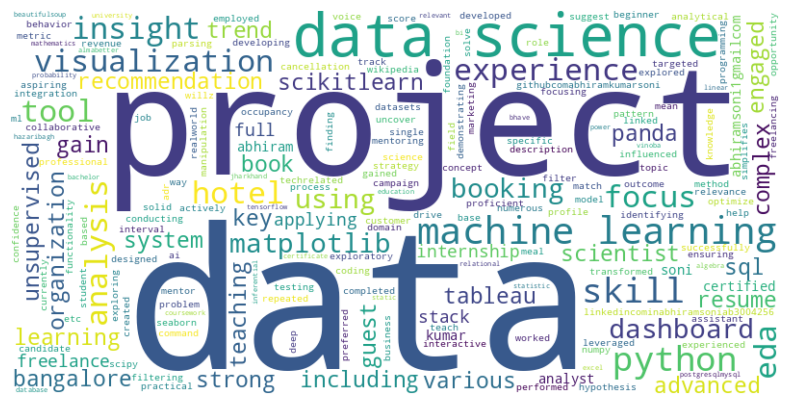

In [ ]:
from google.colab import files
import pdfplumber
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define the text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Define the function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Upload the PDF file
uploaded = files.upload()

# Get the PDF path (filename)
pdf_path = list(uploaded.keys())[0]

# Preprocess the resume
processed_resume = preprocess_text(extract_text_from_pdf(pdf_path))

# Sample job description
job_description = "The 'Data Analytics Intern' will assist the data analytics team in collecting, analyzing, and interpreting data to support business decision-making and strategic initiatives. This role offers hands-on experience with data analysis, statistical methods, and data visualization tools.Selected intern's day-to-day responsibilities include"
# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
resume_matrix = tfidf.fit_transform([processed_resume]).toarray()

# Score resume against the job description
job_score = cosine_similarity(resume_matrix, tfidf.transform([preprocess_text(job_description)])).flatten()[0]

# Suggest missing skills
def suggest_skills(resume_text, job_description):
    resume_words = set(preprocess_text(resume_text).split())
    job_desc_words = set(preprocess_text(job_description).split())
    missing_skills = job_desc_words - resume_words
    return list(missing_skills)

suggested_skills = suggest_skills(processed_resume, job_description)

# Output results
print(f"Score: {job_score}")
print(f"Suggested Skills: {suggested_skills}")

# Define the function to generate and display a word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the processed resume
generate_word_cloud(processed_resume)